# 1. Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error ,mean_absolute_error,log_loss
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# 2. Read In and Explore the Data

In [2]:
#converting into dataframe
df = pd.read_csv('bank.csv')

In [3]:
df.shape

(11162, 17)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df['deposit']=df['deposit'].map({'no': 0, 'yes':1})

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,0.473840
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,0.499338
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit       int64
dtype: object

In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [9]:
df['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

# 3. Exploratory Data Analysis Data Visualization

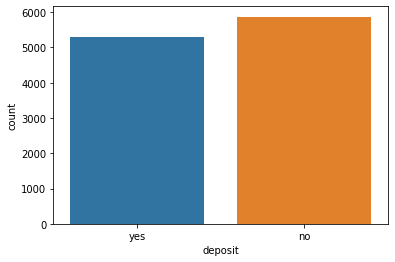

In [35]:
sns.countplot(df.deposit)

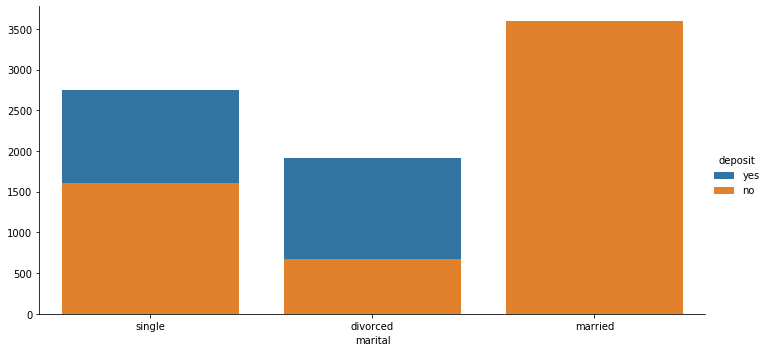

In [76]:
sns.FacetGrid(df,hue='deposit',height=5,aspect=2)\
    .map(sns.countplot,'marital')\
    .add_legend();
plt.show()

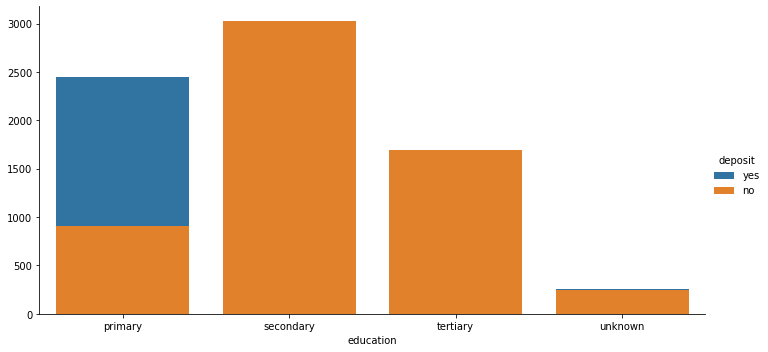

In [77]:
sns.FacetGrid(df,hue='deposit',height=5,aspect=2)\
    .map(sns.countplot,'education')\
    .add_legend();
plt.show()

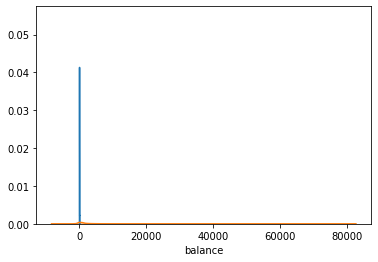

In [49]:
sns.distplot(df['age'])

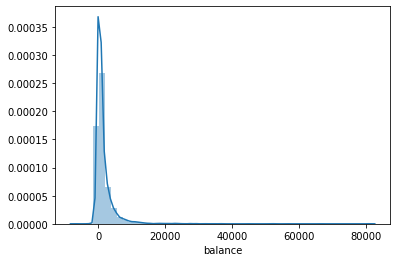

In [50]:
sns.distplot(df['balance'])

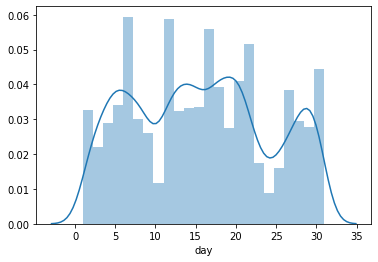

In [51]:
sns.distplot(df['day'])

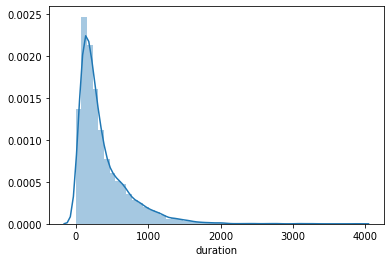

In [52]:
sns.distplot(df['duration'])

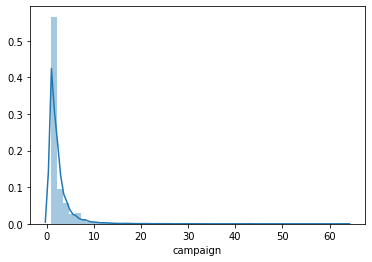

In [53]:
sns.distplot(df['campaign'])

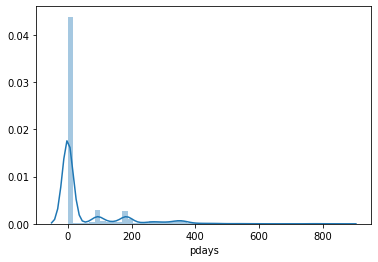

In [54]:
sns.distplot(df['pdays'])

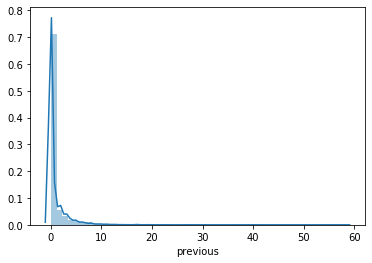

In [55]:
sns.distplot(df['previous'])

In [10]:
['age','balance','day','duration','campaign','pdays','previous']

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [154]:
age_transformed = np.log(df['age']+ 1)
df['age']=age_transformed

balance_transformed = np.log(df['balance']+ 1)
df['balance']=balance_transformed

day_transformed = np.log(df['day']+ 1)
df['day']=day_transformed

duration_transformed = np.log(df['duration']+ 1)
df['duration']=duration_transformed

campaign_transformed = np.log(df['campaign']+ 1)
df['campaign']=campaign_transformed

pdays_transformed = np.log(df['pdays']+ 1)
df['pdays']=pdays_transformed

previous_transformed = np.log(df['age']+ 1)
df['previous']=previous_transformed

# 4. Data pre-processing and cleaning

#### Other way to remove outliers is zscore but it needs all fetures to be numerical

In [58]:
# If data has outliers then we can remove them by using zscore<br>
#from scipy import stats
#z=abs(stats.zscore(df_train))
#print(np.where(z>3))
#df_train=df_train[(z<3).all(axis=1)]

## A.Converting all features to numerical features 

In [76]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit       int64
dtype: object

#### First we need to convert the string values to int so that we can apply the distance based models like KNN 

In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
#df_train['Name']= label_encoder.fit_transform(df_train['Name']) 
df['job']= label_encoder.fit_transform(df['job']) 
df['marital']= label_encoder.fit_transform(df['marital']) 
df['education']= label_encoder.fit_transform(df['education']) 
df['default']= label_encoder.fit_transform(df['default']) 
df['housing']= label_encoder.fit_transform(df['housing']) 
df['loan']= label_encoder.fit_transform(df['loan']) 
df['contact']= label_encoder.fit_transform(df['contact']) 
df['month']= label_encoder.fit_transform(df['month']) 
df['deposit']= label_encoder.fit_transform(df['deposit'])
df['poutcome']= label_encoder.fit_transform(df['poutcome'])

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


## B.Removing outliers using standard methods

In [12]:
# If data has outliers then we can remove them by using zscore<br>
from scipy import stats
z=abs(stats.zscore(df))
print(np.where(z>3))
df=df[(z<3).all(axis=1)]

(array([    1,    11,    12, ..., 11126, 11140, 11146], dtype=int64), array([11, 11, 11, ...,  4, 12,  4], dtype=int64))


### E .Train_test Split

In [13]:
y=df['deposit']
x=df.drop(['deposit'],axis=1)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [15]:
round(X_train, 2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
641,36,6,2,2,0,1240,0,0,0,31,5,812,3,-1,0,3
3428,30,8,2,2,0,7529,0,0,0,20,0,175,6,183,1,2
8511,30,7,1,1,0,271,1,0,2,15,8,365,1,-1,0,3
4574,47,0,0,1,0,295,1,0,2,6,6,94,2,-1,0,3
31,60,9,1,0,0,65,1,0,2,9,8,1028,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6557,40,9,1,1,0,-496,0,0,1,28,5,22,2,-1,0,3
5966,34,9,0,1,0,-276,1,0,2,29,8,175,3,-1,0,3
6181,32,0,1,1,0,-1,0,0,0,8,5,228,2,-1,0,3
999,40,7,2,1,0,1547,1,0,0,20,9,405,1,-1,0,3


### F.Normalizing all numerical features

In [179]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [16]:
from sklearn.preprocessing import Normalizer
feature_scaler = Normalizer()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [17]:
X_train

array([[ 2.42751180e-02,  4.04585300e-03,  1.34861767e-03, ...,
        -6.74308833e-04,  0.00000000e+00,  2.02292650e-03],
       [ 3.98229187e-03,  1.06194450e-03,  2.65486125e-04, ...,
         2.42919804e-02,  1.32743062e-04,  2.65486125e-04],
       [ 6.57916885e-02,  1.53513940e-02,  2.19305628e-03, ...,
        -2.19305628e-03,  0.00000000e+00,  6.57916885e-03],
       ...,
       [ 1.38849869e-01,  0.00000000e+00,  4.33905840e-03, ...,
        -4.33905840e-03,  0.00000000e+00,  1.30171752e-02],
       [ 2.50030230e-02,  4.37552903e-03,  1.25015115e-03, ...,
        -6.25075575e-04,  0.00000000e+00,  1.87522673e-03],
       [ 5.31680147e-02,  1.10766697e-03,  1.10766697e-03, ...,
        -1.10766697e-03,  0.00000000e+00,  3.32300092e-03]])

# Note: Important too check before applying models

### 1. Normalize/Scale the data before applying to distance based models like linear regression or logidtic reg.

### 2. As the data is slightly imbalance we need to use some other measure like AUC

In [98]:
y.value_counts()

0    5387
1    4555
Name: deposit, dtype: int64

In [99]:
# as this is a classificatoin task we cannot use MSE we can use Accuracy but it not works well with imbalane data so we use AUC-ROC

# first we need to calculate the tpr ,fpr , threshold values to draw the confusion matrix and AUC-ROC curve



# 5. Building Models

# Model1 : KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()

parameters = {'n_neighbors': range(1,100,10)}

clf = GridSearchCV(neigh, parameters, cv= 5, scoring='roc_auc')

clf.fit(X_train, y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 100, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [86]:
clf.best_params_

{'n_neighbors': 31}

In [102]:
from sklearn.model_selection import cross_val_score
k_range = range(1,100,10)
k_scores = []


for k in k_range:
  
    knn = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn,X_train, y_train, cv=10, scoring='accuracy')
   
    k_scores.append(scores.mean())
print(k_scores)

[0.7338233849951675, 0.7941732219306589, 0.7974787770376819, 0.7952287779432102, 0.7953789274163298, 0.7926741919293011, 0.7928236667414448, 0.7940257738095661, 0.7901220916331781, 0.7889215657699837]


Text(0, 0.5, 'Cross-Validated Accuracy')

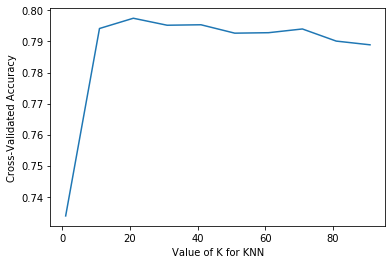

In [103]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

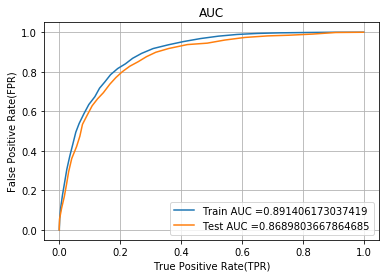

In [87]:
#KNN classifier sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=31)
neigh.fit(X_train, y_train)

y_train_pred = neigh.predict_proba(X_train)  
y_test_pred = neigh.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)

#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Classification Report

In [88]:
y_pred=neigh.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1759
           1       0.79      0.74      0.76      1522

    accuracy                           0.79      3281
   macro avg       0.79      0.79      0.79      3281
weighted avg       0.79      0.79      0.79      3281

0.7890886924718074


## Confusion Matrix

In [89]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [90]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr

from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[ 904  855]
 [  84 1438]]


In [91]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

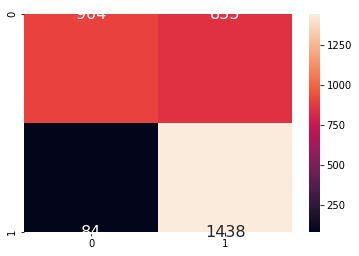

In [92]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 3 : Logistic Regression 

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

model = GridSearchCV(LogisticRegression(),parameters, scoring = 'roc_auc', cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.8748431894511349


In [95]:
model.best_params_

{'C': 100}

In [96]:
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in C:
    #
    Lr = LogisticRegression(C=k)
    
    scores = cross_val_score(Lr,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.600959515500666, 0.7796118028501837, 0.7992785602728001, 0.7988278847096807, 0.7989780348598308]


In [97]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

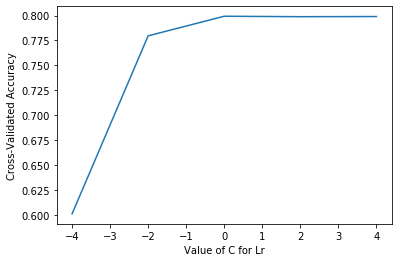

In [98]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for Lr')
plt.ylabel('Cross-Validated Accuracy')

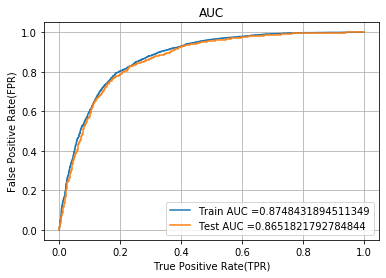

In [99]:
from sklearn.metrics import roc_curve, auc

Lr = LogisticRegression(C=100)
Lr.fit(X_train, y_train)

y_train_pred = Lr.predict_proba(X_train)  
y_test_pred = Lr.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Classification Report

In [100]:
y_pred=Lr.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1759
           1       0.79      0.76      0.78      1522

    accuracy                           0.80      3281
   macro avg       0.80      0.79      0.79      3281
weighted avg       0.80      0.80      0.80      3281

0.7957939652544955


## Confusion Matrix

In [101]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [102]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr

from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[1474  285]
 [ 395 1127]]


In [103]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

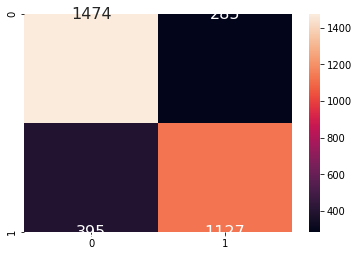

In [104]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 3 : Linear regression 

In [105]:
# we can't use linear regression as its a pure regression model 


# Model 4 : SVM

In [106]:
from sklearn.svm import SVC

parameters = [{'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}]   #'poly','sigmoid' takes too much time

model = GridSearchCV(SVC(),parameters, scoring = 'roc_auc', cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
0.9197273577563378


In [108]:
model.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [109]:
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in C:
    #
    svm = SVC(C=k,gamma= 0.0001,kernel='rbf')
    
    scores = cross_val_score(svm,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.5446630687907418, 0.5446630687907418, 0.5446630687907418, 0.7911733759212651, 0.8015285620753939]


In [110]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

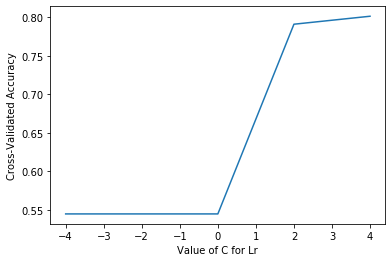

In [111]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for Lr')
plt.ylabel('Cross-Validated Accuracy')

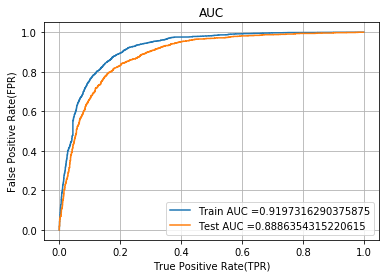

In [112]:
from sklearn.svm import SVC

svm = SVC(C=1,gamma=1,kernel= 'rbf',probability=True)

svm.fit(X_train, y_train)


y_train_pred = svm.predict_proba(X_train)  
y_test_pred = svm.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()
print()

# Classification Report

In [113]:
y_pred=svm.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1759
           1       0.78      0.83      0.81      1522

    accuracy                           0.81      3281
   macro avg       0.81      0.82      0.81      3281
weighted avg       0.82      0.81      0.81      3281

0.8146906430966169


## Confusion Matrix

In [112]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [113]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[102  71]
 [ 18  80]]


In [114]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

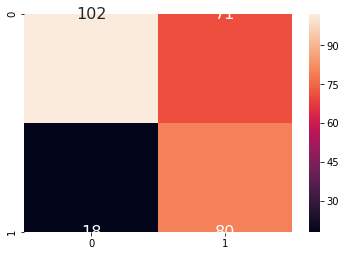

In [115]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 5 : Decision Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier
#min_samples_split :The minimum number of samples required to split an internal node, if less than this number can't split

parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 100],'min_samples_split':[5, 10, 100, 500]}

clf = DecisionTreeClassifier()

model = GridSearchCV(clf,parameters, scoring = 'roc_auc', cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [116]:
model.best_params_

{'max_depth': 10, 'min_samples_split': 100}

In [117]:
from sklearn.model_selection import cross_val_score

max_depth= [1,5,15,25]
k_scores = []

for k in max_depth:
    #
    DT = DecisionTreeClassifier(max_depth=k, min_samples_split=100)
    
    scores = cross_val_score(DT,X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.715808055465595, 0.7860707416392732, 0.7914770454642623, 0.7908762197509929]


Text(0, 0.5, 'Cross-Validated Accuracy')

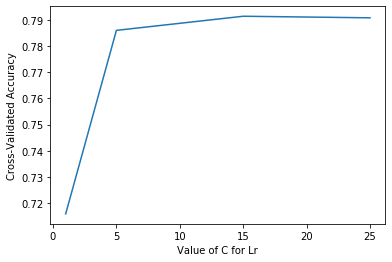

In [118]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(max_depth, k_scores)
plt.xlabel('Value of C for Lr')
plt.ylabel('Cross-Validated Accuracy')

# Tried without hyperparameters

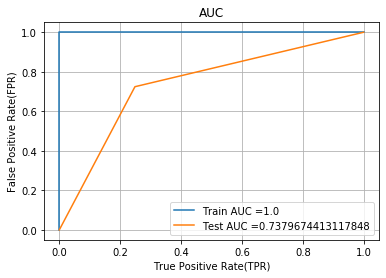

In [132]:
DT = DecisionTreeClassifier()

DT.fit(X_train, y_train)


y_train_pred = DT.predict_proba(X_train)  
y_test_pred = DT.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()
print()

## Overfitting on train data as we are training very deep trees 

# Traning with best hyperparameters

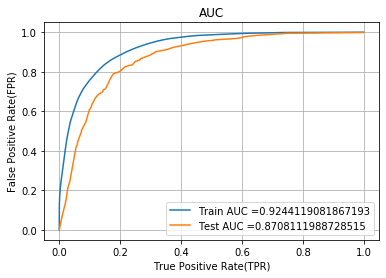

In [119]:
DT = DecisionTreeClassifier(max_depth=10,min_samples_split=100)

DT.fit(X_train, y_train)


y_train_pred = DT.predict_proba(X_train)  
y_test_pred = DT.predict_proba(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1]) #sklearn.metrics.roc_curve(y_true, y_score)
#probability estimates of the positive class therefore pred[:,Positive class index]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()
print()

# Classification Report

In [120]:
y_pred=DT.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1759
           1       0.79      0.80      0.79      1522

    accuracy                           0.81      3281
   macro avg       0.80      0.80      0.80      3281
weighted avg       0.81      0.81      0.81      3281

0.8052423041755562


## Confusion Matrix

In [121]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

In [122]:
# First we need to write a function which will select the prob_score as threshold and return the class labels to calculate tpr,fpr
print("Test confusion matrix")
print(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
[[ 864  895]
 [  61 1461]]


In [123]:
test_df = pd.DataFrame(confusion_matrix(y_test, find_y_pred_by_best_threshold(y_test_pred[:,1], tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

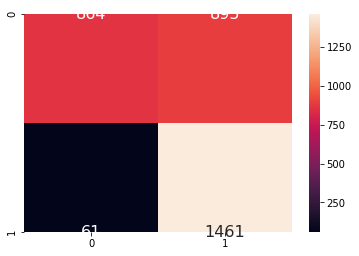

In [124]:
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Model 6 : Ensemble Techniques 

## A. Bagging

In [127]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = RandomForestClassifier()

model = GridSearchCV(clf,parameters, scoring = 'roc_auc', cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
1.0


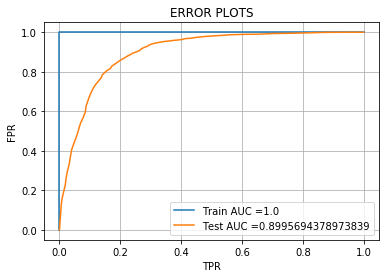

In [137]:
from sklearn.model_selection import GridSearchCV

RF=RandomForestClassifier(max_depth=40,n_estimators=70,class_weight='balanced')
RF.fit(X_train, y_train)


y_train_pred =  RF.predict_proba(X_train)[:,1]      
y_test_pred =  RF.predict_proba(X_test)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# Classification Report

In [138]:
y_pred=RF.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1759
           1       0.81      0.83      0.82      1522

    accuracy                           0.83      3281
   macro avg       0.83      0.83      0.83      3281
weighted avg       0.83      0.83      0.83      3281

0.8277964035355074


## Confusion Matrix

In [140]:
def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

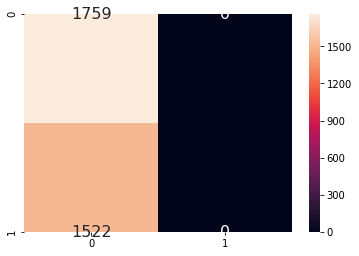

In [141]:
test_df = pd.DataFrame(confusion_matrix(y_test,find_y_pred_by_best_threshold(y_test_pred, tr_thresholds,train_fpr,train_tpr)), range(2),range(2))
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Boosting

In [142]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = GradientBoostingClassifier()

model = GridSearchCV(clf,parameters, scoring = 'roc_auc', cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_test, y_test))


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.90221903647022


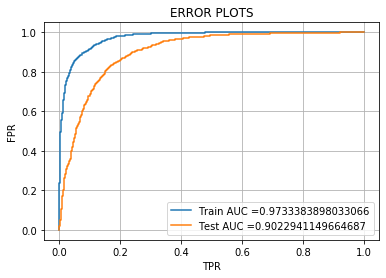

In [143]:
from sklearn.model_selection import GridSearchCV

GBDT=GradientBoostingClassifier(max_depth=5,n_estimators=100)
GBDT.fit(X_train, y_train)


y_train_pred =  GBDT.predict_proba(X_train)[:,1]      
y_test_pred =  GBDT.predict_proba(X_test)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [144]:
y_pred=GBDT.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1759
           1       0.80      0.84      0.82      1522

    accuracy                           0.83      3281
   macro avg       0.83      0.83      0.83      3281
weighted avg       0.83      0.83      0.83      3281

0.8296251142944224


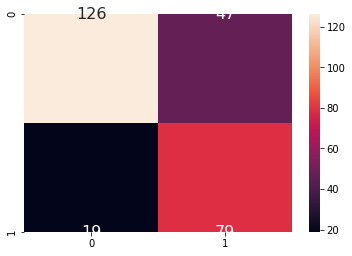

In [150]:
test_df = pd.DataFrame(confusion_matrix(y_test,find_y_pred_by_best_threshold(y_test_pred, tr_thresholds,train_fpr,train_tpr)), range(2),range(2))
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

# Stacking

## Note: As we have very less data stascking is not advisable 

## Tried using SGDclassifier with different types of loss 

In [18]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [19]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(X_train, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(X_train, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf3.fit(X_train, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(X_train, y_train)
#print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(X_train, y_train)
#print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(X_train, y_train)
#print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(X_train, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_test, sclf.predict_proba(X_test))))
    log_error =log_loss(y_test, sclf.predict_proba(X_test))
    if best_alpha > log_error:
        best_alpha = log_error

--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 0.686
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 0.652
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 0.598
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 0.579
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 0.577
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 0.577


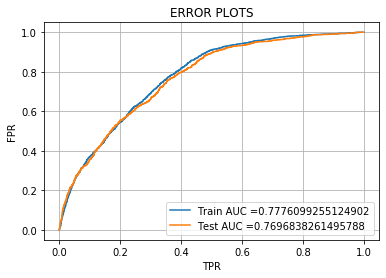

In [21]:
lr = LogisticRegression(C=1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(X_train, y_train)


y_train_pred =  sclf.predict_proba(X_train)[:,1]      
y_test_pred =  sclf.predict_proba(X_test)[:,1]  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

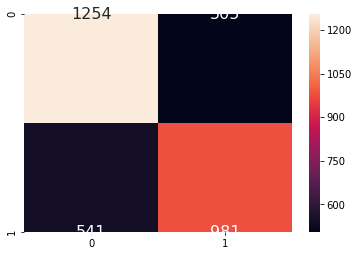

In [22]:
## Confusion Matrix

def find_y_pred_by_best_threshold(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
 
  #  print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
                if i>=t:
                    predictions.append(1)
                else:
                    predictions.append(0)
    return predictions

test_df = pd.DataFrame(confusion_matrix(y_test,find_y_pred_by_best_threshold(y_test_pred, tr_thresholds,train_fpr,train_tpr)), range(2),range(2))
sns.heatmap(test_df, annot=True,annot_kws={"size": 16}, fmt='g')

## XGBoost

[15:26:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


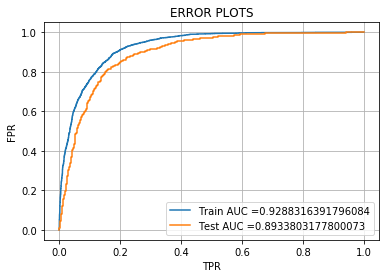

In [146]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)


y_train_pred =  xgb_model.predict(X_train)      
y_test_pred =  xgb_model.predict(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# 6.Model Comparison

In [23]:
#https://stackoverflow.com/questions/18601688/python-prettytable-example

from prettytable import PrettyTable
table = PrettyTable()

#setting column names
table.field_names = [ "Sr.No","Model", "Accuracy", "AUC"]

#setting row values
table.add_row(['1',"KNN", '78.90','86.89' ])
table.add_row(['2',"Naive Bayes",'79.57' ,'86.51' ])
table.add_row(['3',"Logistic Regression", '83.39','86.07' ])
table.add_row(['4',"SVM", '81.46','88.86' ])
table.add_row(['5',"Decision Tree",'80.52' ,'87.88' ])
table.add_row(['6',"RandomForest",'82.77' ,'89.95' ])
table.add_row(['7',"GBDT",'82.96' ,'90.22' ])
table.add_row(['8',"Xgboost",'--' ,'89.33' ])
table.add_row(['9',"Stacking", '--','79.96' ])
print(table)

+-------+---------------------+----------+-------+
| Sr.No |        Model        | Accuracy |  AUC  |
+-------+---------------------+----------+-------+
|   1   |         KNN         |  78.90   | 86.89 |
|   2   |     Naive Bayes     |  79.57   | 86.51 |
|   3   | Logistic Regression |  83.39   | 86.07 |
|   4   |         SVM         |  81.46   | 88.86 |
|   5   |    Decision Tree    |  80.52   | 87.88 |
|   6   |     RandomForest    |  82.77   | 89.95 |
|   7   |         GBDT        |  82.96   | 90.22 |
|   8   |       Xgboost       |    --    | 89.33 |
|   9   |       Stacking      |    --    | 79.96 |
+-------+---------------------+----------+-------+


Summary:<br>
1.GBDT is the best model amongst all with AUC of 90.22.<br>
2.As the data is imbalanced the accuracy score is affected.<br>

# 7.Creating Submission File

In [25]:
best_model=GBDT
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(best_model, filename)

['finalized_model.sav']